# Mesh Generation in FEniCS #

We have used FEniCS's built-in mesher previously.

In [1]:
from fenics import *

%matplotlib inline

In [2]:
mesh = UnitCubeMesh(10, 10, 10)

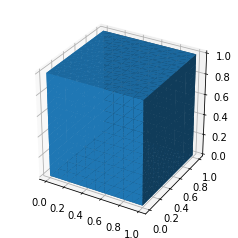

In [3]:
plot(mesh)

These meshes are symmetric, and hence they are good for studying superconvergence of FEM.

Unstructured mesh generation is supported in the module `mshr`.

In [4]:
from mshr import *

## Generate polygonal meshes in 2-D ##

We can geenrate a mesh from a polygon. 

<img src='https://fenicsproject.org/olddocs/dolfin/1.4.0/python/_images/plot_polygonmesh.png'>

We define a polygon by making a list of its vertices. We need a closed polygon, so the first and the last element in the list is the same point. We represent the points with instances of Point. Point takes `(x,y,z)` as arguments. Since we have a 2D-geometry, we can omit `z`.

In [5]:
# Create list of polygonal domain vertices
domain_vertices = [Point(0.0, 0.0),
                   Point(10.0, 0.0),
                   Point(10.0, 2.0),
                   Point(8.0, 2.0),
                   Point(7.5, 1.0),
                   Point(2.5, 1.0),
                   Point(2.0, 4.0),
                   Point(0.0, 4.0),
                   Point(0.0, 0.0)]

pg = Polygon(domain_vertices)

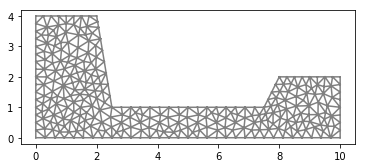

In [6]:
# Generate mesh and plot
mesh = generate_mesh(pg, 20);
plot(mesh, interactive=True)

## Create CSG 2D-geometry ##

This example demonstrates use of 2D geometries in FEniCS. The domain looks as follows:
<img src='https://fenicsproject.org/olddocs/dolfin/1.4.0/python/_images/csg_boundary.png'>

First, we create a `Rectangle` defined by two opposite corners:

In [7]:
r = Rectangle(Point(0.5, 0.5), Point(1.5, 1.5))

We then create a circle object:

In [8]:
c = Circle(Point(1, 1), 1)

The center of the circle is given a point, and the second argument gives the radius. 
We may use these geometries to define a new geometry by subtracting one from the other:

In [9]:
g2d = c - r

Finally, we generate a mesh using `generate_mesh` and plot it.

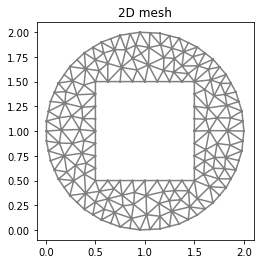

In [10]:
# Generate and plot mesh
mesh2d = generate_mesh(g2d, 10)
plot(mesh2d, title="2D mesh")

Note that when we create a mesh from a CSG geometry, the resolution must be specified.
It is given by an integer as a second argument in `generate_mesh`.

## Create CSG 3D-geometry ##

This example demonstrates generate of 3-D mesh in FEniCS.
<img src='https://fenicsproject.org/olddocs/dolfin/1.4.0/python/_images/csg3D_boundary.png'>

We define 3D geometries. We start with defining a box by sending
the coordinates of two opposite corners as arguments to the class `Box`.

In [11]:
box = Box(Point(0, 0, 0), Point(1, 1, 1))

We create a sphere by sending the center and radius to `Sphere`. 
The center `(x_0, y_0, z_0)` is represented by an instance of `Point`.

In [12]:
sphere = Sphere(Point(0, 0, 0), 0.3)

We define a `Cone` by four arguments: the center at one end `Point`,
the center at the other end `Point`, and the radii at these points.

In [13]:
cone1 = Cone(Point(0., 0., -1.), Point(0., 0., 3.), 1.)

cone2 = Cone(Point(0., 0., 1.), Point(0., 0., 3.), 0.5)

Now we have some geometries that we can play with:

In [14]:
g3d = box + cone1 - cone2 - sphere

This simple line makes a geometry of the union of the box and the
cone, from which the sphere is subtracted.

Finally, we generate a mesh using `generate_mesh` and plot it.

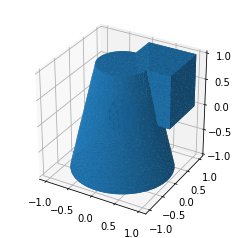

In [15]:
mesh3d = generate_mesh(g3d, 32)
info(mesh3d)
plot(mesh3d, "3D mesh")